# preparation

In [1]:
# setting up kaggle authentication
# Just do one of the following

# -------------------------------------------------------------
# # 1. change permission 
# ! chmod 600 ~/.kaggle/kaggle.json

# -------------------------------------------------------------
# 2. set environment variable  <<==== !!choose now!!
import os
import json

with open("../../token/kaggle.json", mode="r") as f:
    json_data = json.load(f)
os.environ["KAGGLE_USERNAME"] = json_data["username"]
os.environ["KAGGLE_KEY"] = json_data["key"]

In [2]:
# ! pip install kaggle
# ! apt install zip unzip

# # download kaggle dataset and unzip 
# ! kaggle competitions download -c allstate-claims-severity
# ! unzip allstate-claims-severity.zip

# EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## make a data frame

In [4]:
train_df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')

In [5]:
train_df

In [6]:
test_df

## check overview

In [7]:
print(f"\
      train_df: {train_df.isnull().values.any()} \n \
      test_df: {test_df.isnull().values.any()} \n \
      ")

      train_df: False 
       test_df: False 
       


<AxesSubplot:xlabel='loss', ylabel='Count'>

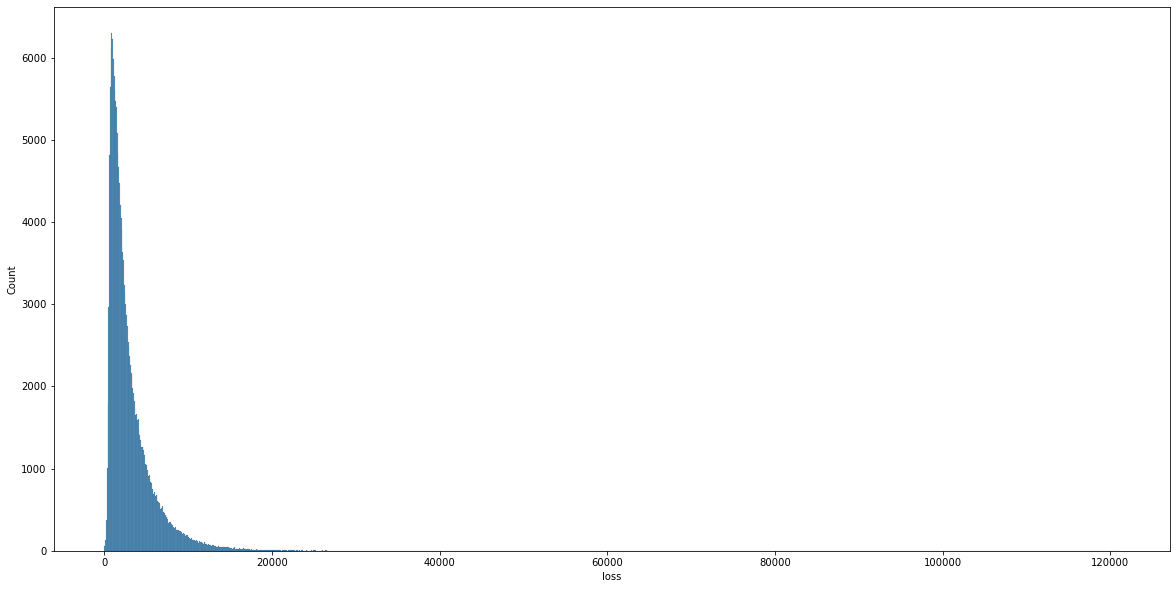

In [8]:
# Check the distribution of the target variable
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(train_df['loss'], ax=ax, kde=False)

In [9]:
# ! pip install pandas-profiling
import pandas_profiling as pdp

In [10]:
# pdp.ProfileReport(train_df)

In [11]:
# profile = _
# profile.to_file("train_df_profiling")

In [12]:
# sns.pairplot(train_df_numcols)

In [13]:
# pg = _
# pg.savefig('train_df_numcols-pairplot.png')

# Prep for model building

## make a joined data frame

In [14]:
test_df['loss'] = np.nan
test_df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,NaN
6,A,B,A,B,A,A,A,A,B,A,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,NaN
9,A,B,A,B,B,A,B,A,B,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,NaN
12,A,A,A,A,B,A,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,NaN
15,B,A,A,A,A,B,A,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,A,A,A,B,A,A,A,A,A,A,...,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN
587621,A,A,A,A,B,B,A,B,A,A,...,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN
587627,B,B,A,A,B,A,A,A,B,B,...,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN


In [15]:
joined_df = pd.concat([train_df, test_df])

In [26]:
joined_df.info() # show all col dtype param: verbose=True

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313864 entries, 1 to 587634
Columns: 131 entries, cat1 to loss
dtypes: float64(15), int64(116)
memory usage: 316.1 MB


In [17]:
joined_df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,A,A,A,B,A,A,A,A,A,A,...,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN
587621,A,A,A,A,B,B,A,B,A,A,...,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN
587627,B,B,A,A,B,A,A,A,B,B,...,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN


## split num_cal and cat_cal

In [18]:
# separate only numerical data frame
numerical_cols = [cname for cname in joined_df.columns
                  if joined_df[cname].dtype == 'float64']

In [19]:
joined_df_numcols = joined_df[numerical_cols].copy()
joined_df_numcols

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,
1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,0.458463,0.245921,0.654310,0.284048,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN
587621,0.304143,0.488789,0.549770,0.267727,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN
587627,0.899689,0.555782,0.484196,0.594598,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN


In [20]:
# separate only categorical data frame
categorical_cols = [cname for cname in joined_df.columns
                    if (joined_df[cname].dtype == "object")]

In [21]:
joined_df_catcols = joined_df[categorical_cols].copy()
# if you need loss col, active below line
# train_df_catcols = train_df_catcols.merge(joined_df['loss'], on='id') 
joined_df_catcols

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,J,G,BU,BC,C,AS,S,A,O,LB
2,A,B,A,A,A,A,A,A,B,B,...,K,K,BI,CQ,A,AV,BM,A,O,DP
5,A,B,A,A,B,A,A,A,B,B,...,F,A,AB,DK,A,C,AF,A,I,GK
10,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
11,A,B,A,B,A,A,A,A,B,B,...,G,B,H,C,C,Y,BM,A,K,CK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,A,A,A,B,A,A,A,A,A,A,...,F,D,BI,CL,C,AI,H,A,K,GS
587621,A,A,A,A,B,B,A,B,A,A,...,J,K,BI,DM,A,AV,BJ,J,O,DP
587627,B,B,A,A,B,A,A,A,B,B,...,H,G,BI,BP,A,E,BM,A,P,LY


## Preprocessing of categorical data

In [24]:
# Factoring category variables
for col in list(joined_df_catcols.columns):
    joined_df[col], _ = pd.factorize(joined_df[col].values, sort=True)
joined_df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,0,1,0,0,0,0,0,0,1,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,0,1,0,0,1,0,0,0,1,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,1,1,0,1,0,0,0,0,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,0,1,0,1,0,0,0,0,1,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,0,0,0,1,0,0,0,0,0,0,...,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN
587621,0,0,0,0,1,1,0,1,0,0,...,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN
587627,1,1,0,0,1,0,0,0,1,1,...,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN


In [ ]:
# joined_df['loss'] != NaN --> train_df
# joined_df['loss'] == NaN --> test_df

train_df = joined_df[joined_df['loss'].notnull()]
test_df = joined_df[joined_df['loss'].isna()]

In [ ]:
train_df

In [ ]:
test_df